In [ ]:
# PANUTAD SIRIKUL
# 650510714

# Image Quantisation

รูปภาพ (electronic) ประกอบขึ้นจากหน่วยย่อยทีเรียกว่า pixel โดยส่วนใหญ่แต่ละ pixel จะแสดงด้วยตัวเลขสามตัวซึงมีค่าได้ตังแต่ 0–255 ตัวเลขแต่ละตัวแสดงถึงความเข้มของสีแดง เขียว และนํ้าเงิน (ลําดับการแสดงสีอาจแตกต่างกันออกไปตามมาตรฐาน) ตัวอย่างเช่น pixel สีแดงสามารถแทนด้วย [255 0 0] นันคือมีความเข้มสีแดงสูงสุด และไม่มีสีเขียวหรือนํ้าเงินปนเลย

ในการประมวลผลภาพ pixel สามารถมองเป็น input vector ในสามมิติได้ (แต่ละค่าสีแทน feature ทั้งสามของ input) จากนิยามของ pixel ข้างต้น เราสามารถคํานวณได้ว่า ค่าเฉดสีที่เป็นไปได้ทั้งหมดของ pixel จะมีค่าเท่ากับ 256x256x256 เฉดสี ซึ่งถือว่าละเอียดมาก บางครั้งอาจเกินความจําเป็น

เพื่อการลดจํานวนเฉดสีที่รูปภาพภาพหนึ่งจะแสดงได้ จึงมีการคิดค้นวิธี Image Color Quantisation เพื่อลดจํานวนเฉดสีลง วิธีดังกล่าวอาศัย clustering algorithm เพื่อ cluster เฉดสีที่มีความใกล้เคียงกันเข้าไว้ด้วยกัน จากนั้น จะแสดงเฉดสีที่ถูกจัดอยู่ใน cluster เดียวกันด้วยเฉดสีทีเป็น centroid ของ cluster นั้น ๆ

ในงานนี้ให้นักศึกษาสร้าง colab notebook ที implement การทํา image color quantisation ด้วย clustering algorithm ใดก็ได้ยกเว้น k-means พร้อมแสดงผลลัพธ์บน colab  

**หมายเหตุ** งานชิ้นนี้จําเป็นต้องใช้ library ในการประมวลผลภาพ ซึ่งมีให้เลือกใช้หลายตัวได้แก่ opencv, scikit-image, pillow เป็นต้น

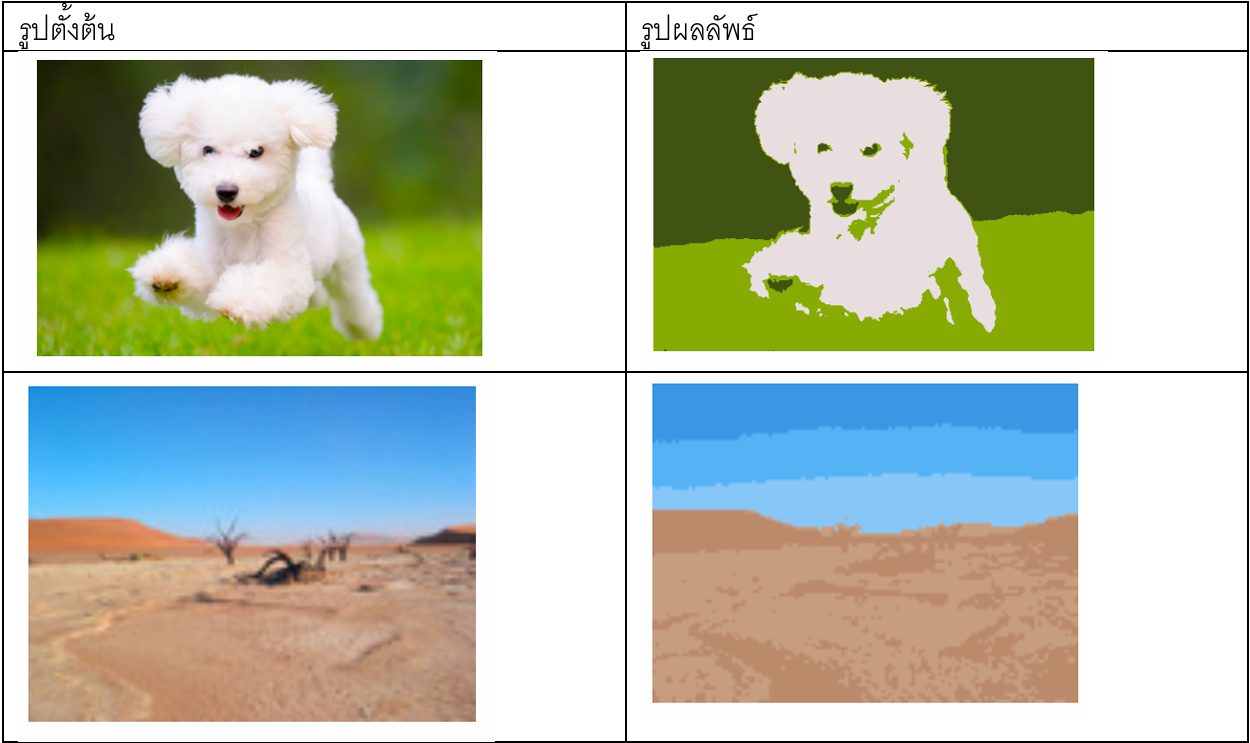

## **Gaussian Mixture Models (GMM)**

เลือกใช้ GMM ในการทำ Image Color Quantisation จาก scikit-learn

(URL: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

In [8]:
import cv2 # Library for Image Processing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

### **8 Clusters**

In [14]:
# Input Image
image = cv2.imread("Beetle.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB

pixels = image.reshape(-1, 3) # Convert to 2-Dimensional Array, x 3 Color Pixels

In [5]:
# Construct GMM and determine number of colors
n_colors = 8
GMM = GaussianMixture(n_components=n_colors, random_state=42)
GMM.fit(pixels)

labels = GMM.predict(pixels) # Predict each pixel's cluster

# Replace pixel's color with mean value of its cluster
quantized_pixels = GMM.means_[labels].astype(np.uint8)
quantized_image = quantized_pixels.reshape(image.shape)

แสดงภาพต้นฉบับและภาพผลลัพธ์หลังการทำ Image Color Quantisation

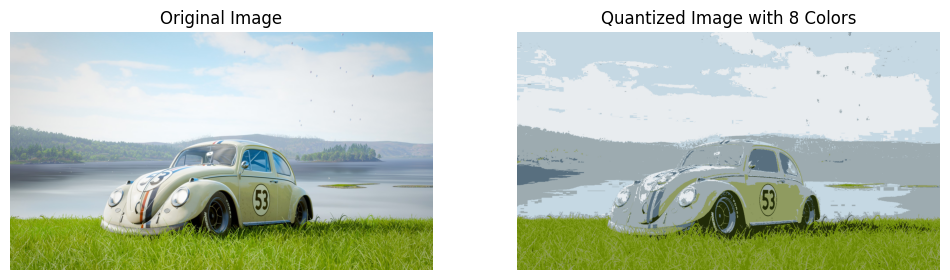

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

In [9]:
# Input Image
image = cv2.imread("Autumn.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB

pixels = image.reshape(-1, 3) # Convert to 2-Dimensional Array, x 3 Color Pixels

In [10]:
# Construct GMM and determine number of colors
n_colors = 8
GMM = GaussianMixture(n_components=n_colors, random_state=42)
GMM.fit(pixels)

labels = GMM.predict(pixels) # Predict each pixel's cluster

# Replace pixel's color with mean value of its cluster
quantized_pixels = GMM.means_[labels].astype(np.uint8)
quantized_image = quantized_pixels.reshape(image.shape)

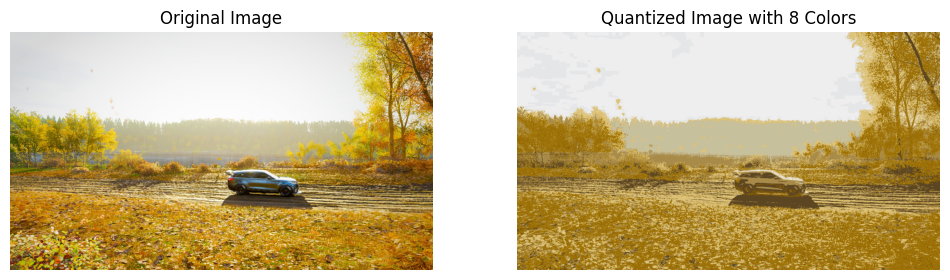

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

### **5 Clusters**

ลองกำหนดให้เหลือเพียงแค่ 5 สี (5 clusters)

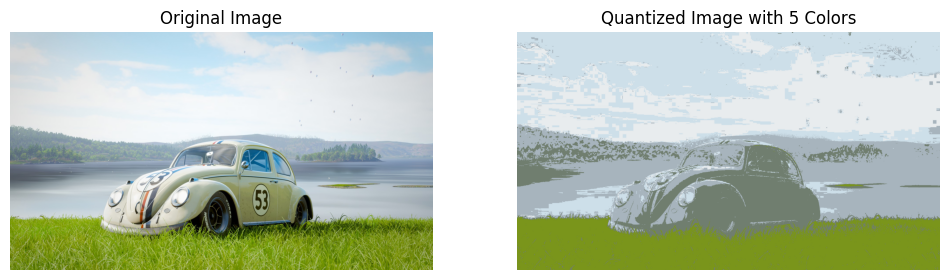

In [7]:
n_colors = 5
GMM = GaussianMixture(n_components=n_colors, random_state=42)
GMM.fit(pixels)
labels = GMM.predict(pixels)
quantized_pixels = GMM.means_[labels].astype(np.uint8)
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

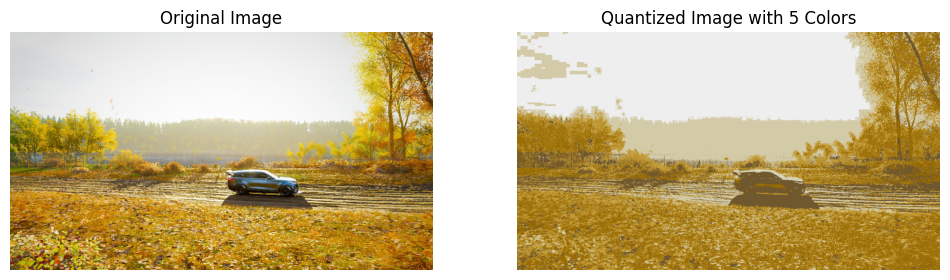

In [12]:
n_colors = 5
GMM = GaussianMixture(n_components=n_colors, random_state=42)
GMM.fit(pixels)
labels = GMM.predict(pixels)
quantized_pixels = GMM.means_[labels].astype(np.uint8)
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

### **3 Clusters**

ลองกำหนดให้เหลือเพียงแค่ 3 สี (3 clusters)

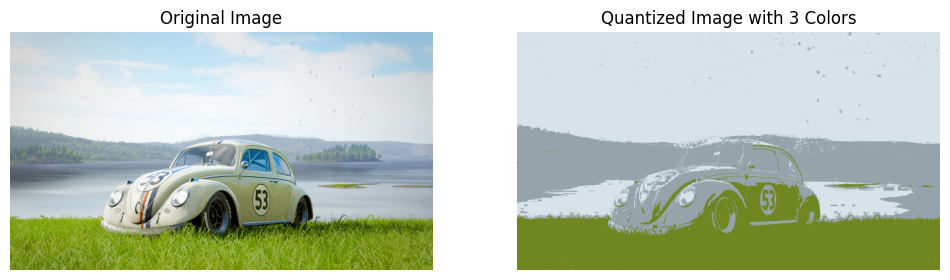

In [15]:
n_colors = 3
GMM = GaussianMixture(n_components=n_colors, random_state=42)
GMM.fit(pixels)
labels = GMM.predict(pixels)
quantized_pixels = GMM.means_[labels].astype(np.uint8)
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

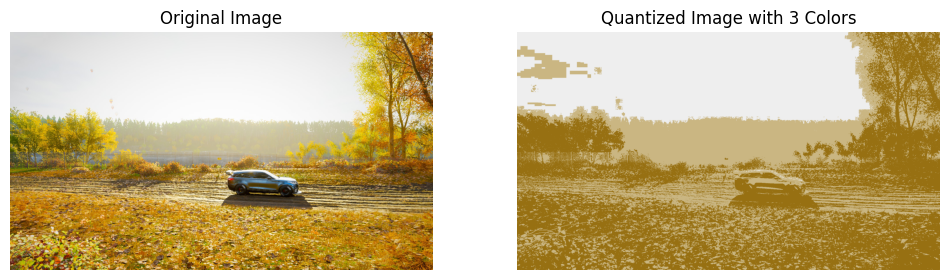

In [13]:
n_colors = 3
GMM = GaussianMixture(n_components=n_colors, random_state=42)
GMM.fit(pixels)
labels = GMM.predict(pixels)
quantized_pixels = GMM.means_[labels].astype(np.uint8)
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

## Mean Shift Clustering

ทดลองใช้ Mean Shift ในการทำ Image Color Quantisation

(URL: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

In [18]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Input Image
image = cv2.imread("Beetle.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB
pixels = image.reshape(-1, 3) # Convert to 2-Dimensional Array, x 3 Color Pixels

In [13]:
# Construct Mean Shift Model and estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(pixels, quantile=0.1, n_samples=500)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(pixels)

# Predict each pixel's cluster
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_.astype(np.uint8)

# Replace pixel's color with mean value of its cluster
quantized_pixels = cluster_centers[labels]
quantized_image = quantized_pixels.reshape(image.shape)

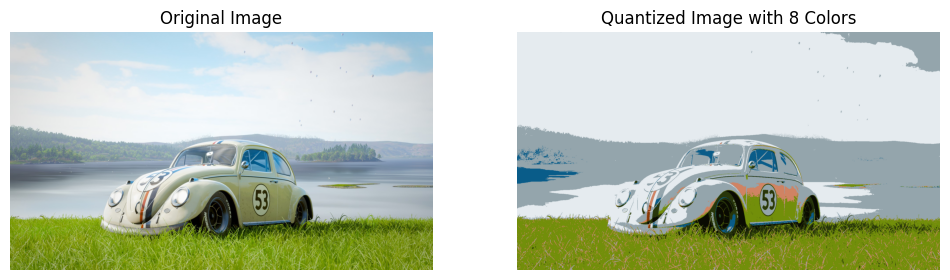

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {len(np.unique(labels))} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

In [19]:
image = cv2.imread("Autumn.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image.reshape(-1, 3)

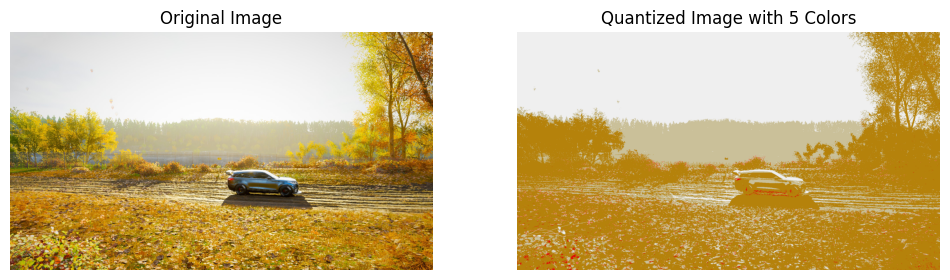

In [20]:
bandwidth = estimate_bandwidth(pixels, quantile=0.1, n_samples=500)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(pixels)
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_.astype(np.uint8)
quantized_pixels = cluster_centers[labels]
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {len(np.unique(labels))} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

เนื่องจาก Mean Shift ไม่สามารถกำหนดหรือควบคุมจำนวนสี (cluster) ได้โดยตรงเหมือน K-means หรือ GMM ทำให้รูปผลลัพธ์มีจำนวนสีหรือจำนวน cluster ที่ตัว Mean Shift  Model คำนวณเลือกมาให้

## Fuzzy C-Means
ลองใช้ Fuzzy C-Means สำหรับ Image Color Quantisation

(URL: https://www.geeksforgeeks.org/ml-fuzzy-clustering/)

In [1]:
! pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


In [27]:
import skfuzzy as fuzz

image = cv2.imread('Beetle.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image.reshape(-1, 3).T  # Transpose สำหรับ Fuzzy C-Means

### **8 Clusters**

In [5]:
# Cluster = 8
n_colors = 8

# Fuzzy C-Means Clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(pixels, c=n_colors, m=2, error=0.005, maxiter=1000)

# Convert Member Value (u) to label
labels = np.argmax(u, axis=0)

# Replace pixels with center value of its cluster
quantized_pixels = cntr[labels].astype(np.uint8).T
quantized_image = quantized_pixels.reshape(image.shape)

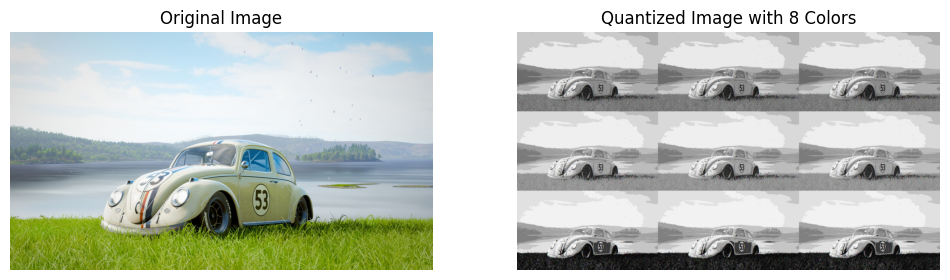

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

In [23]:
image = cv2.imread("Autumn.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image.reshape(-1, 3).T # Transpose สำหรับ Fuzzy C-Means

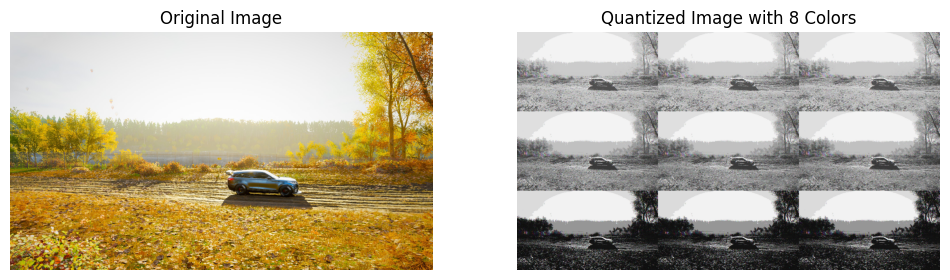

In [24]:
n_colors = 8
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(pixels, c=n_colors, m=2, error=0.005, maxiter=1000)
labels = np.argmax(u, axis=0)
quantized_pixels = cntr[labels].astype(np.uint8).T
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

### **5 Clusters**
ทดลองกำหนดให้ใช้ 5 สี (5 clusters)

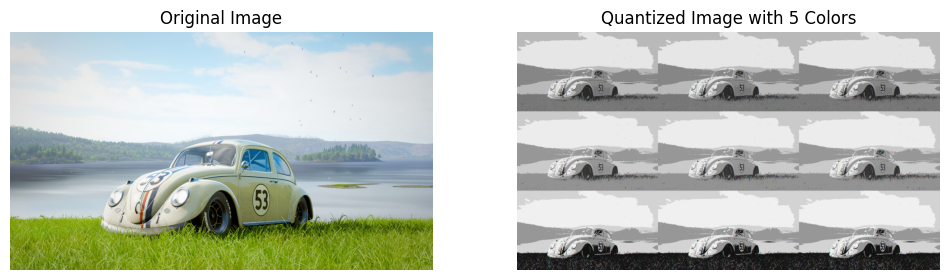

In [7]:
# Cluster = 5
n_colors = 5

# Fuzzy C-Means Clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(pixels, c=n_colors, m=2, error=0.005, maxiter=1000)

# Convert Member Value (u) to label
labels = np.argmax(u, axis=0)

# Replace pixels with center value of its cluster
quantized_pixels = cntr[labels].astype(np.uint8).T
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

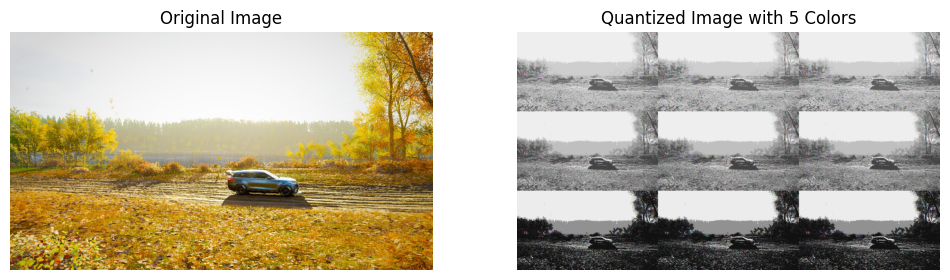

In [25]:
n_colors = 5
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(pixels, c=n_colors, m=2, error=0.005, maxiter=1000)
labels = np.argmax(u, axis=0)
quantized_pixels = cntr[labels].astype(np.uint8).T
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

### **3 Clusters**

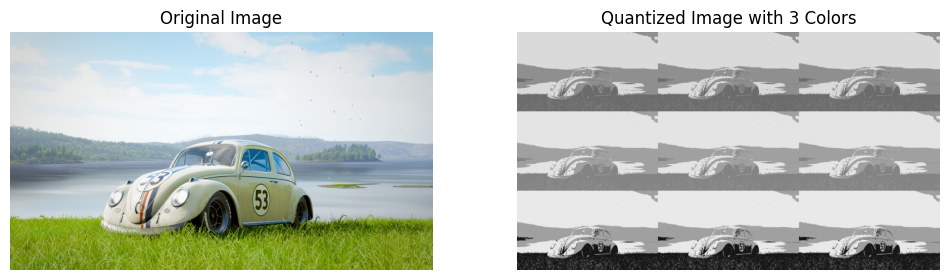

In [28]:
n_colors = 3
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(pixels, c=n_colors, m=2, error=0.005, maxiter=1000)
labels = np.argmax(u, axis=0)
quantized_pixels = cntr[labels].astype(np.uint8).T
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

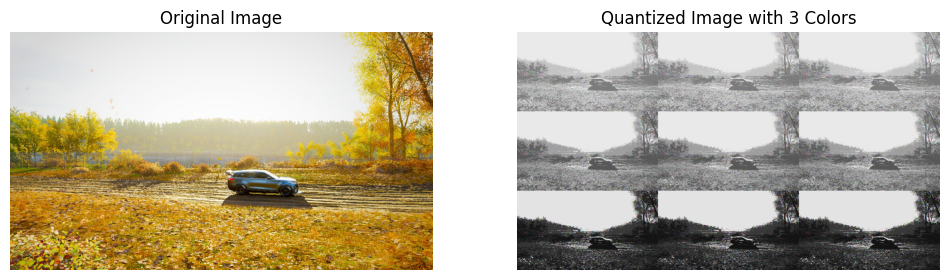

In [26]:
n_colors = 3
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(pixels, c=n_colors, m=2, error=0.005, maxiter=1000)
labels = np.argmax(u, axis=0)
quantized_pixels = cntr[labels].astype(np.uint8).T
quantized_image = quantized_pixels.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image with {n_colors} Colors')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()